In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 导入数据
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/testA.csv')

In [2]:
data_train.shape, data_test.shape

((800000, 47), (200000, 46))

In [3]:
# 为了方便后续处理，我们将训练集和测试集合并

# 提取目标变量
target = data_train['isDefault']
data_train.drop(['isDefault'], axis=1, inplace=True)

data_train['source'] = 'train'
data_test['source'] = 'test'
data = pd.concat([data_train, data_test], ignore_index=True)

data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,source
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0,train
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,train
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0,train
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0,train
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0,train


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 47 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  int64  
 1   loanAmnt            1000000 non-null  float64
 2   term                1000000 non-null  int64  
 3   interestRate        1000000 non-null  float64
 4   installment         1000000 non-null  float64
 5   grade               1000000 non-null  object 
 6   subGrade            1000000 non-null  object 
 7   employmentTitle     999999 non-null   float64
 8   employmentLength    941459 non-null   object 
 9   homeOwnership       1000000 non-null  int64  
 10  annualIncome        1000000 non-null  float64
 11  verificationStatus  1000000 non-null  int64  
 12  issueDate           1000000 non-null  object 
 13  purpose             1000000 non-null  int64  
 14  postCode            999999 non-null   float64
 15  regionCode      

In [5]:
# 查看有哪些缺失值，并且对缺失值数量进行排序
missing = data.isnull().sum() / len(data)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing

employmentTitle       0.000001
postCode              0.000001
title                 0.000001
dti                   0.000300
pubRecBankruptcies    0.000521
revolUtil             0.000658
n10                   0.041633
n4                    0.041633
n12                   0.050381
n9                    0.050381
n7                    0.050381
n6                    0.050381
n3                    0.050381
n13                   0.050381
n2                    0.050381
n1                    0.050381
n0                    0.050381
n5                    0.050381
n14                   0.050381
n8                    0.050382
employmentLength      0.058541
n11                   0.087327
dtype: float64

<Axes: >

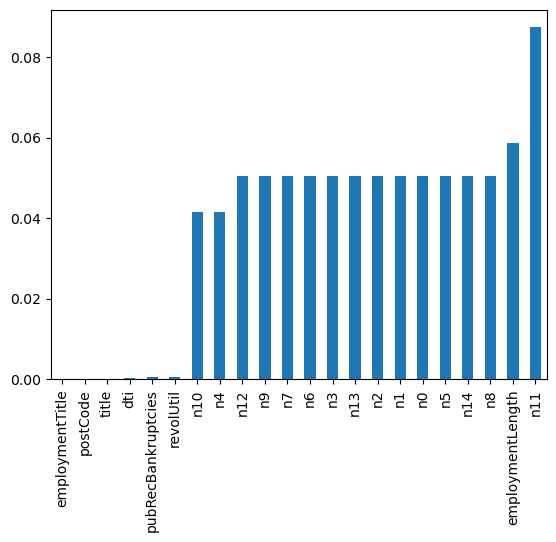

In [6]:
# 进行可视化
missing.plot.bar()

In [7]:
# 将离散型变量和连续型变量分开
cate = data.select_dtypes(include='object').columns
numerical = data.columns.difference(cate)

cate, numerical

(Index(['grade', 'subGrade', 'employmentLength', 'issueDate',
        'earliesCreditLine', 'source'],
       dtype='object'),
 Index(['annualIncome', 'applicationType', 'delinquency_2years', 'dti',
        'employmentTitle', 'ficoRangeHigh', 'ficoRangeLow', 'homeOwnership',
        'id', 'initialListStatus', 'installment', 'interestRate', 'loanAmnt',
        'n0', 'n1', 'n10', 'n11', 'n12', 'n13', 'n14', 'n2', 'n3', 'n4', 'n5',
        'n6', 'n7', 'n8', 'n9', 'openAcc', 'policyCode', 'postCode', 'pubRec',
        'pubRecBankruptcies', 'purpose', 'regionCode', 'revolBal', 'revolUtil',
        'term', 'title', 'totalAcc', 'verificationStatus'],
       dtype='object'))

In [8]:
# 对离散型变量进行缺失值填充，采用众数填充
for c in cate:
    data[c].fillna(data[c].mode()[0], inplace=True)
    
# 对连续型变量进行缺失值填充，采用均值填充
for n in numerical:
    data[n].fillna(data[n].mean(), inplace=True)

In [9]:
data.isnull().any().sum()

0

In [10]:
# 查看数据类型
data.dtypes.value_counts()

float64    33
int64       8
object      6
Name: count, dtype: int64

In [11]:
#查看所有的object类型
data.select_dtypes(include='object').apply(pd.Series.nunique, axis=0)

grade                  7
subGrade              35
employmentLength      11
issueDate            139
earliesCreditLine    726
source                 2
dtype: int64

In [12]:
# 获取所有的object类型列，排除掉两个时间变量issueDate和earliesCreditLine
object_cols = data.select_dtypes(include='object').columns
object_cols = object_cols.drop(['issueDate', 'earliesCreditLine'])



# 循环遍历每一列，将其转换为数值类型
for col in object_cols:
    unique_values = sorted(data[col].unique())
    mapping = dict(zip(unique_values, range(len(unique_values))))
    data[col] = data[col].map(mapping)

# 查看转换后的结果
data[object_cols].head()

,grade,subGrade,employmentLength,source
0,4,21,2,1
1,3,16,5,1
2,3,17,8,1
3,0,3,1,1
4,2,11,1,1


In [13]:
data['earliesCreditLine'].sample(5)

# 选取earliesCreditLine中的年份
data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda x: int(x[-4:]))

data['earliesCreditLine'].value_counts(dropna=False).sort_index()

earliesCreditLine
1944        2
1945        1
1946        2
1949        1
1950        7
        ...  
2011    12282
2012     8304
2013     4375
2014     1863
2015      251
Name: count, Length: 70, dtype: int64

In [14]:
data['issueDate'].sample(5)

data['issueDate'] = data['issueDate'].apply(lambda x: int(x[0:4]))

data['issueDate'].value_counts(dropna=False).sort_index()

issueDate
2007       191
2008      1139
2009      3528
2010      8545
2011     16201
2012     39805
2013    100208
2014    165632
2015    279002
2016    218070
2017    125796
2018     41883
Name: count, dtype: int64

In [15]:
# pip install pandas_profiling
import pandas_profiling
from pydantic_settings import BaseSettings

pfr = pandas_profiling.ProfileReport(data_train)
pfr.to_file("./example.html")

ModuleNotFoundError: No module named 'pandas_profiling'